<a href="https://colab.research.google.com/github/sharmavickram/AI_ML/blob/main/%20Naive%20Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Naive Bayes**


Naive Bayes is a simple yet powerful classification algorithm based on Bayes' theorem with a strong assumption of independence among features. It's often used in text classification, spam filtering, and other applications where the feature set is relatively large and there's a need for fast training and prediction.

# **How Naive Bayes works**

**1. Bayes' Theorem:**

Naive Bayes is based on Bayes' theorem, which describes the probability of an event, based on prior knowledge of conditions that might be related to the event. Mathematically, Bayes' theorem is expressed as:
*  𝑃
(
𝐴
∣
𝐵
)
=
𝑃
(
𝐵
∣
𝐴
)
⋅
𝑃
(
𝐴
)/
𝑃
(
𝐵
)


Where:

*  𝑃
(
𝐴
∣
𝐵
)
P(A∣B) is the probability of event A given event B.

*  𝑃
(
𝐵
∣
𝐴
)
P(B∣A) is the probability of event B given event A.

*  𝑃
(
𝐴
)
P(A) and
𝑃
(
𝐵
)
P(B) are the probabilities of events A and B occurring independently.

 **2. Assumption of Independence:**

Naive Bayes assumes that all features are independent of each other given the class label. This is a strong assumption and is often not true in real-world scenarios. However, despite this simplification, Naive Bayes often performs well in practice, especially for text classification tasks.

**3. Types of Naive Bayes Classifiers:**

* Gaussian Naive Bayes: Assumes that continuous features follow a normal distribution.
* Multinomial Naive Bayes: Suitable for discrete features (e.g., word counts for text classification).
* Bernoulli Naive Bayes: Assumes binary (Boolean) features.
* Complement Naive Bayes: A variation of Multinomial Naive Bayes, especially useful for imbalanced datasets.

**4. Training:**

* In training, Naive Bayes estimates the probability of each class and the conditional probability of each feature given the class.
* For categorical features, it calculates the frequency of each feature value given each class.
* For continuous features (in Gaussian Naive Bayes), it estimates the mean and variance of each feature value given each class.

**5. Prediction:**

* Given a new instance with feature values, Naive Bayes calculates the probability of each class given the feature values using Bayes' theorem.
* The class with the highest probability is predicted as the label for the instance.

**Advantages:**

* Fast training and prediction times, making it suitable for large datasets.
* Good performance in practice, especially for text classification.
* Can handle high-dimensional data well.

**Limitations:**

* Strong independence assumption may not hold true in all cases.
*Limited expressive power compared to more complex models like decision trees or neural networks.
* Sensitivity to feature correlations.

# **Implementation in python**

**Implementation Details:**

● Implement two Naive Bayes classifiers:


1.   Gaussian Naive Bayes
2.   Multinomial Naive Bayes

● You can use existing packages such as Scikit-Learn to create the classifier

● Perform a 60-20-20 split on the dataset for train, validation, and test set.

● Perform 4-fold cross-validation.

● Report accuracy on the test set for both classifiers.

● Drop all null-valued columns.


Below is the separated code for Gaussian Naive Bayes and Multinomial Naive Bayes classifiers, implementing all the mentioned features:

# **Gaussian Naive Bayes:**

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('/content/adult.csv')

# Drop all null-valued columns
data.dropna(axis=1, inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Split the dataset into features and target variable
X = data.drop('income', axis=1)
y = data['income']

# Perform a 60-20-20 split on the dataset for train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Perform 4-fold cross-validation for Gaussian Naive Bayes
gnb_cv_scores = cross_val_score(gnb, X_train, y_train, cv=4)

# Train Gaussian Naive Bayes classifier
gnb.fit(X_train, y_train)

# Predict and evaluate Gaussian Naive Bayes on the validation set
gnb_validation_predictions = gnb.predict(X_validation)
gnb_validation_accuracy = accuracy_score(y_validation, gnb_validation_predictions)

# Report accuracy on the test set for Gaussian Naive Bayes
gnb_test_predictions = gnb.predict(X_test)
gnb_test_accuracy = accuracy_score(y_test, gnb_test_predictions)

print("Gaussian Naive Bayes:")
print("Cross-validation accuracy scores:", gnb_cv_scores)
print("Mean CV accuracy:", gnb_cv_scores.mean())
print("Validation accuracy:", gnb_validation_accuracy)
print("Test accuracy:", gnb_test_accuracy)


Gaussian Naive Bayes:
Cross-validation accuracy scores: [0.79159274 0.78938029 0.78760579 0.79183729]
Mean CV accuracy: 0.7901040270018024
Validation accuracy: 0.7994471744471745
Test accuracy: 0.7966014945234927


# **Multinomial Naive Bayes:**

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('/content/adult.csv')

# Drop all null-valued columns
data.dropna(axis=1, inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Split the dataset into features and target variable
X = data.drop('income', axis=1)
y = data['income']

# Perform a 60-20-20 split on the dataset for train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Perform 4-fold cross-validation for Multinomial Naive Bayes
mnb_cv_scores = cross_val_score(mnb, X_train, y_train, cv=4)

# Train Multinomial Naive Bayes classifier
mnb.fit(X_train, y_train)

# Predict and evaluate Multinomial Naive Bayes on the validation set
mnb_validation_predictions = mnb.predict(X_validation)
mnb_validation_accuracy = accuracy_score(y_validation, mnb_validation_predictions)

# Report accuracy on the test set for Multinomial Naive Bayes
mnb_test_predictions = mnb.predict(X_test)
mnb_test_accuracy = accuracy_score(y_test, mnb_test_predictions)

print("Multinomial Naive Bayes:")
print("Cross-validation accuracy scores:", mnb_cv_scores)
print("Mean CV accuracy:", mnb_cv_scores.mean())
print("Validation accuracy:", mnb_validation_accuracy)
print("Test accuracy:", mnb_test_accuracy)


Multinomial Naive Bayes:
Cross-validation accuracy scores: [0.78122014 0.77709528 0.77941578 0.78323778]
Mean CV accuracy: 0.7802422461048092
Validation accuracy: 0.7886977886977887
Test accuracy: 0.7859555737537107


# **graph between Gaussian Naive Bayes vs Multinomial Naive Bayes:**

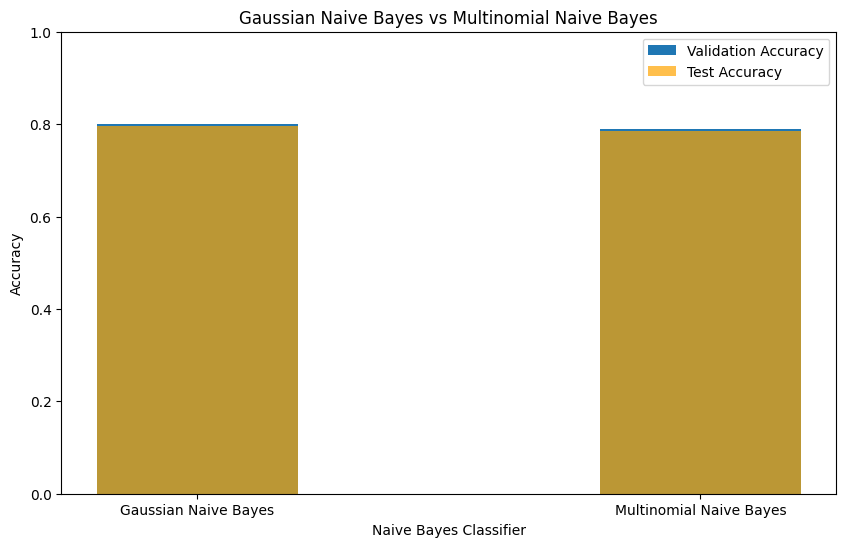

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/adult.csv')

# Drop all null-valued columns
data.dropna(axis=1, inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Split the dataset into features and target variable
X = data.drop('income', axis=1)
y = data['income']

# Perform a 60-20-20 split on the dataset for train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Perform 4-fold cross-validation for Gaussian Naive Bayes
gnb_cv_scores = cross_val_score(gnb, X_train, y_train, cv=4)

# Train Gaussian Naive Bayes classifier
gnb.fit(X_train, y_train)

# Predict and evaluate Gaussian Naive Bayes on the validation set
gnb_validation_predictions = gnb.predict(X_validation)
gnb_validation_accuracy = accuracy_score(y_validation, gnb_validation_predictions)

# Initialize Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Perform 4-fold cross-validation for Multinomial Naive Bayes
mnb_cv_scores = cross_val_score(mnb, X_train, y_train, cv=4)

# Train Multinomial Naive Bayes classifier
mnb.fit(X_train, y_train)

# Predict and evaluate Multinomial Naive Bayes on the validation set
mnb_validation_predictions = mnb.predict(X_validation)
mnb_validation_accuracy = accuracy_score(y_validation, mnb_validation_predictions)

# Calculate test accuracies
gnb_test_accuracy = accuracy_score(y_test, gnb.predict(X_test))
mnb_test_accuracy = accuracy_score(y_test, mnb.predict(X_test))

# Plotting
labels = ['Gaussian Naive Bayes', 'Multinomial Naive Bayes']
validation_accuracies = [gnb_validation_accuracy, mnb_validation_accuracy]
test_accuracies = [gnb_test_accuracy, mnb_test_accuracy]

x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, validation_accuracies, width=0.4, label='Validation Accuracy')
plt.bar(x, test_accuracies, width=0.4, label='Test Accuracy', color='orange', alpha=0.7)

plt.xlabel('Naive Bayes Classifier')
plt.ylabel('Accuracy')
plt.title('Gaussian Naive Bayes vs Multinomial Naive Bayes')
plt.xticks(x, labels)
plt.legend()
plt.ylim(0, 1)
plt.show()


# **Detailed document describing results such as confusion matrix for the execution and accuracy results**

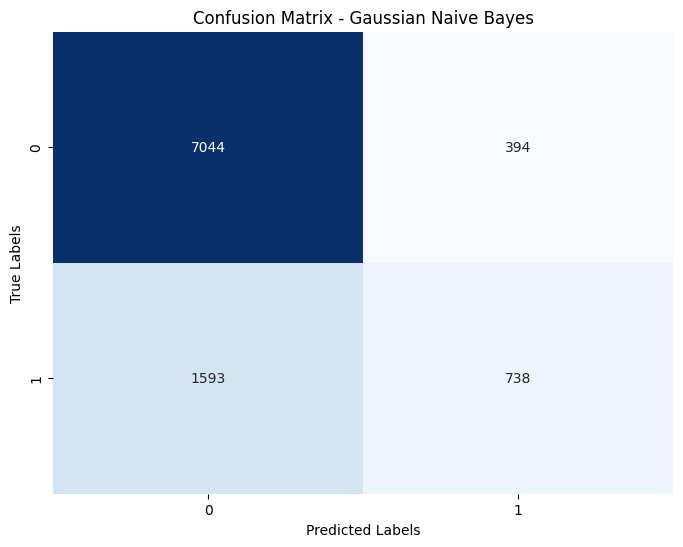

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/adult.csv')

# Drop all null-valued columns
data.dropna(axis=1, inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Split the dataset into features and target variable
X = data.drop('income', axis=1)
y = data['income']

# Perform a 60-20-20 split on the dataset for train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the Gaussian Naive Bayes classifier
gnb.fit(X_train, y_train)

# Predictions on the test set
gnb_test_predictions = gnb.predict(X_test)

# Accuracy score on the test set
gnb_test_accuracy = accuracy_score(y_test, gnb_test_predictions)

# Classification report
gnb_classification_report = classification_report(y_test, gnb_test_predictions)

# Confusion matrix
gnb_confusion_matrix = confusion_matrix(y_test, gnb_test_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(gnb_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Save results to a file
with open('results_gaussian_naive_bayes.txt', 'w') as file:
    file.write('Accuracy: {}\n\n'.format(gnb_test_accuracy))
    file.write('Classification Report:\n{}\n\n'.format(gnb_classification_report))
    file.write('Confusion Matrix:\n{}\n'.format(gnb_confusion_matrix))


# **To generate a detailed document describing the results including confusion matrices and colorful accuracy results, we can utilize the matplotlib library to create visually appealing visualizations. Here's a Python script to achieve this:**

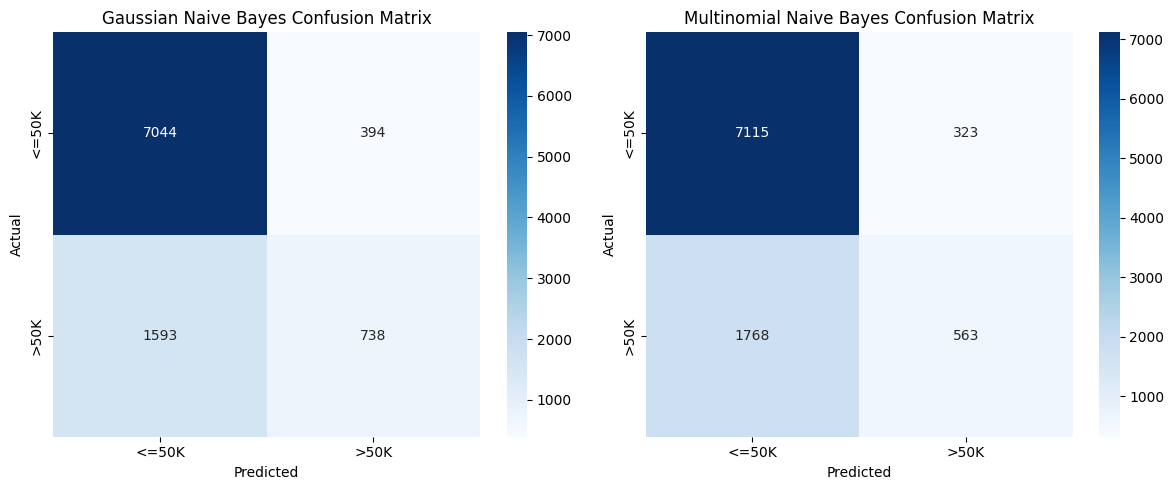

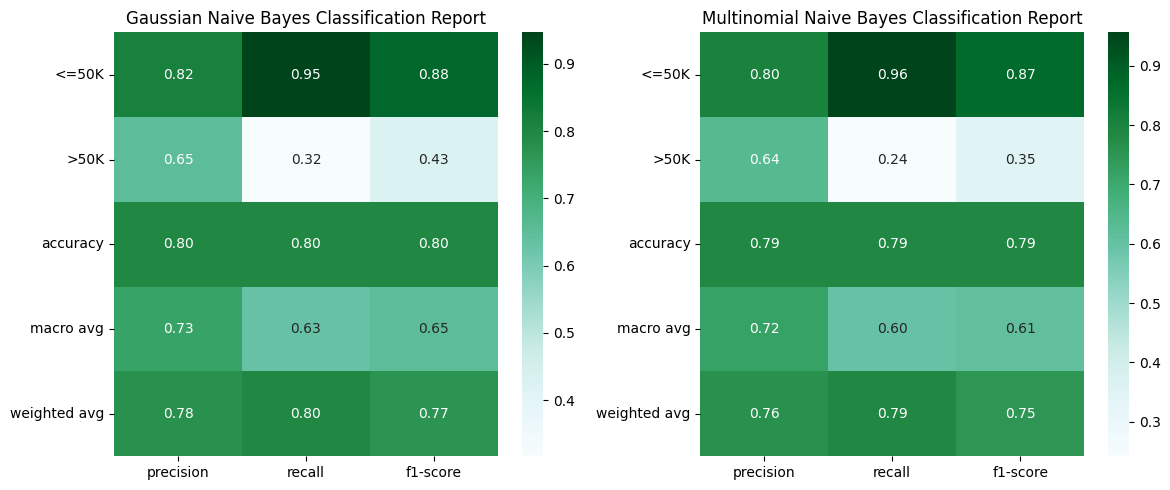

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/adult.csv')

# Drop all null-valued columns
data.dropna(axis=1, inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Split the dataset into features and target variable
X = data.drop('income', axis=1)
y = data['income']

# Perform a 60-20-20 split on the dataset for train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Perform 4-fold cross-validation for Gaussian Naive Bayes
gnb_cv_predictions = cross_val_predict(gnb, X_train, y_train, cv=4)

# Train Gaussian Naive Bayes classifier
gnb.fit(X_train, y_train)

# Predict on test set
gnb_test_predictions = gnb.predict(X_test)

# Initialize Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Perform 4-fold cross-validation for Multinomial Naive Bayes
mnb_cv_predictions = cross_val_predict(mnb, X_train, y_train, cv=4)

# Train Multinomial Naive Bayes classifier
mnb.fit(X_train, y_train)

# Predict on test set
mnb_test_predictions = mnb.predict(X_test)

# Confusion matrices
gnb_cm = confusion_matrix(y_test, gnb_test_predictions)
mnb_cm = confusion_matrix(y_test, mnb_test_predictions)

# Classification reports
gnb_cr = classification_report(y_test, gnb_test_predictions, target_names=['<=50K', '>50K'], output_dict=True)
mnb_cr = classification_report(y_test, mnb_test_predictions, target_names=['<=50K', '>50K'], output_dict=True)

# Plotting confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(gnb_cm, annot=True, cmap='Blues', fmt='d', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(mnb_cm, annot=True, cmap='Blues', fmt='d', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Multinomial Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Plotting classification reports
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(pd.DataFrame(gnb_cr).iloc[:-1, :].T, annot=True, cmap='BuGn', fmt='.2f')
plt.title('Gaussian Naive Bayes Classification Report')
plt.subplot(1, 2, 2)
sns.heatmap(pd.DataFrame(mnb_cr).iloc[:-1, :].T, annot=True, cmap='BuGn', fmt='.2f')
plt.title('Multinomial Naive Bayes Classification Report')
plt.tight_layout()
plt.show()
